In [ ]:
# plotting code inspired by: http://iguananaut.net/blog/programming/git-logs-in-pandas.html

In [9]:
import os
import pickle
import email

import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

import seaborn as sns
from scipy.interpolate import UnivariateSpline

In [4]:
%matplotlib inline

In [5]:
from IPython.core.debugger import Tracer

In [6]:
storage_path = '/home/zormit/bigdata/innovation-thesis/'
projects_data_filename = '/home/zormit/ownCloud/Uni/msemester5/innovation-thesis/data/projects.csv'

In [9]:
def load_headers(storage_path, projects_data_filename):
    projects_data = pd.read_csv(projects_data_filename, skipfooter=1, engine='python')
    headers = dict()
    for row_id, project_data in projects_data.iterrows():
        project_headers_filename = os.path.join(
            storage_path,
            'header',
            project_data.list_id+'.pkl')
        with open(project_headers_filename, 'rb') as project_headers:
            headers[project_data.list_id] = pickle.load(project_headers)
    return headers

In [10]:
headers = load_headers(storage_path, projects_data_filename)

In [11]:
headers.keys()

dict_keys(['gmane.comp.boot-loaders.grub.devel', 'gmane.comp.emulators.kvm.devel', 'gmane.comp.boot-loaders.u-boot', 'gmane.comp.emulators.bochs.devel', 'gmane.comp.emulators.freedos.devel', 'gmane.comp.db.axion.devel', 'gmane.comp.bug-tracking.flyspray.devel', 'gmane.comp.cad.geda.devel', 'gmane.comp.bug-tracking.request-tracker.devel', 'gmane.comp.desktop.rox.devel', 'gmane.comp.db.monetdb.devel', 'gmane.comp.bug-tracking.bugzilla.devel', 'gmane.comp.desktop.xfce.devel.version4'])

In [13]:
emails = {}
for project, p_headers in headers.items():
    print(project)
    p_emails = []
    for header in p_headers:
        email_datetime = email.utils.parsedate_to_datetime(header['Date'])
        try:
            from_name, from_address = email.utils.parseaddr(header['From'])
        except TypeError:
            print("could not parse from-header")
        p_emails.append((email_datetime.date(), from_address))
    
    p_emails = pd.DataFrame(p_emails, columns=['date', 'from_address'])
    p_emails = p_emails.set_index('date').sort_index()
    p_emails.index = p_emails.index.to_datetime()
    emails[project] = p_emails
    
    # break # go only over one project, for development purposes

gmane.comp.boot-loaders.grub.devel
gmane.comp.emulators.kvm.devel
could not parse from-header
could not parse from-header
could not parse from-header
could not parse from-header
could not parse from-header
could not parse from-header
could not parse from-header
could not parse from-header
could not parse from-header
gmane.comp.boot-loaders.u-boot
could not parse from-header
could not parse from-header
could not parse from-header
could not parse from-header
could not parse from-header
could not parse from-header
could not parse from-header
could not parse from-header
could not parse from-header
could not parse from-header
could not parse from-header
could not parse from-header
could not parse from-header
could not parse from-header
gmane.comp.emulators.bochs.devel
gmane.comp.emulators.freedos.devel
gmane.comp.db.axion.devel
could not parse from-header
gmane.comp.bug-tracking.flyspray.devel
gmane.comp.cad.geda.devel
could not parse from-header
gmane.comp.bug-tracking.request-tracker.deve

In [14]:
emails

{'gmane.comp.boot-loaders.grub.devel':                                from_address
 2006-12-01                 tgingold@free.fr
 2006-12-02               mgerards@xs4all.nl
 2006-12-02               mgerards@xs4all.nl
 2006-12-02                  okuji@enbug.org
 2006-12-02                  okuji@enbug.org
 2006-12-02                  okuji@enbug.org
 2006-12-03      Eeri.Kask@inf.tu-dresden.de
 2006-12-03                  okuji@enbug.org
 2006-12-04               mgerards@xs4all.nl
 2006-12-04            hollis@penguinppc.org
 2006-12-04               mgerards@xs4all.nl
 2006-12-04               Aaron.Kerr@Sun.COM
 2006-12-04  nico-linux-grub@schottelius.org
 2006-12-05            hollis@penguinppc.org
 2006-12-05                  okuji@enbug.org
 2006-12-05                  okuji@enbug.org
 2006-12-05                  okuji@enbug.org
 2006-12-05                  okuji@enbug.org
 2006-12-06               bibo.mao@intel.com
 2006-12-06      Eeri.Kask@inf.tu-dresden.de
 2006-12-07      

In [56]:
# pickle.dump(emails, open('../data/intermediate_results/emails_with_from_address_20160622.pkl', 'wb'))
emails = pickle.load(open('../data/intermediate_results/emails_with_from_address_20160622.pkl', 'rb'))

In [10]:
def plot_counts_per_time(counts, title):
    n = len(counts)
    samples = 1000
    
    fn = UnivariateSpline(range(n), counts)
    fig, ax = plt.subplots(1)
    fig.set_size_inches((18, 6))
    x = np.linspace(0, n, samples)
    plt.fill_between(x, 0, fn(x))
    ax.set_title(title)
    ax.set_xlim(0, n)
    ax.set_ylim(0, max(counts) + 0.1 * max(counts))
    ax.xaxis.set_ticks(np.linspace(0, n - 1, 8)[1:-1])
    
    def formatter(x, p):
        if x >= len(counts.index):
            return ''
        return counts.index[int(x)].strftime('%b %Y')

    formatter = FuncFormatter(formatter)
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.setp(plt.xticks()[1], rotation=30)
    
    loc = MultipleLocator(base=6) # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(loc)

/home/zormit/.virtualenvs/innovation-thesis/lib/python3.4/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


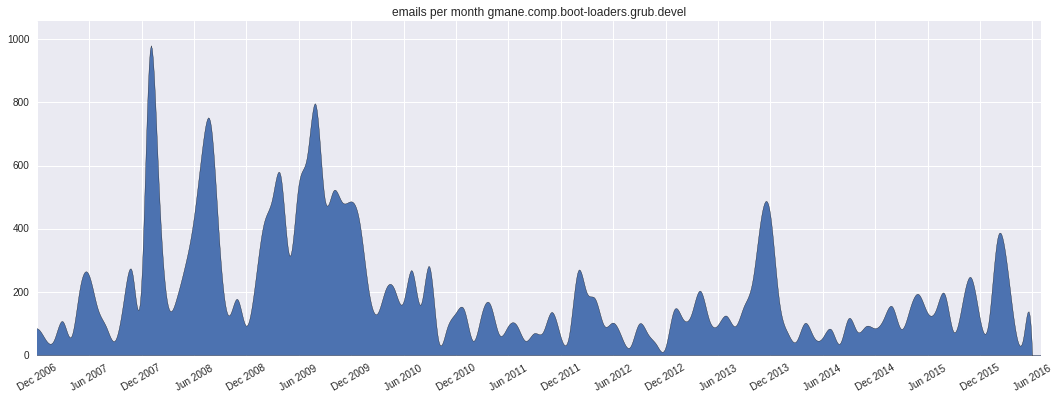

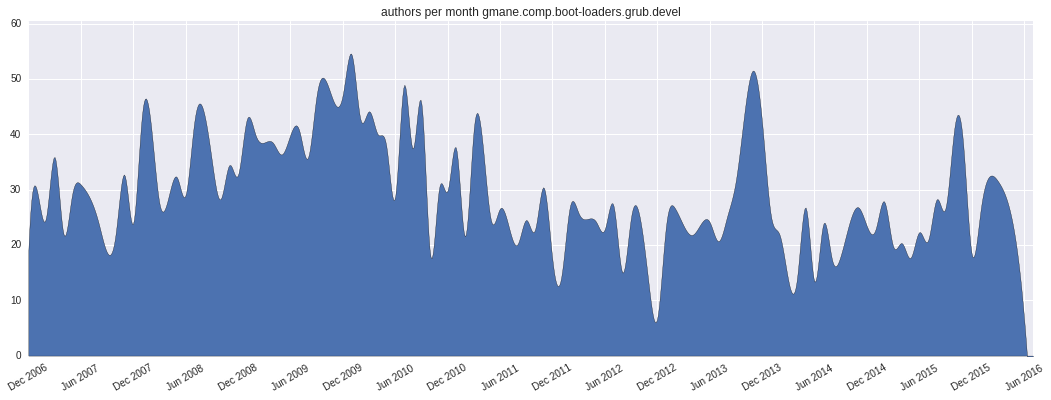

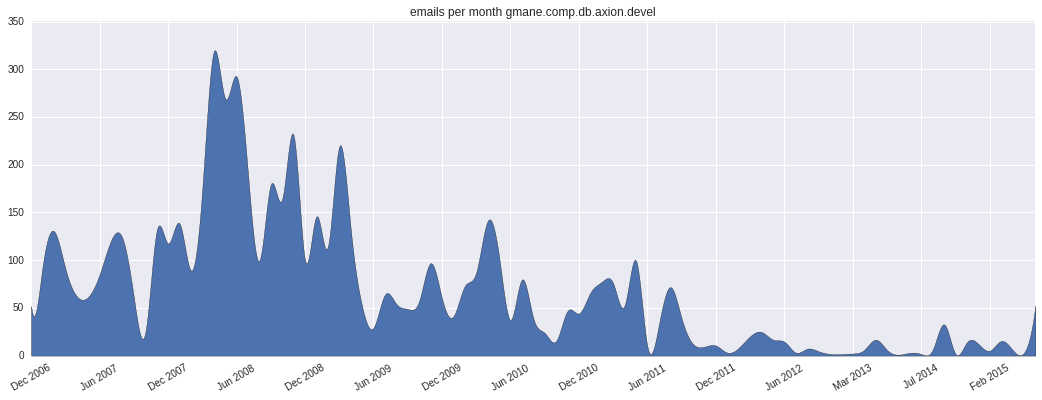

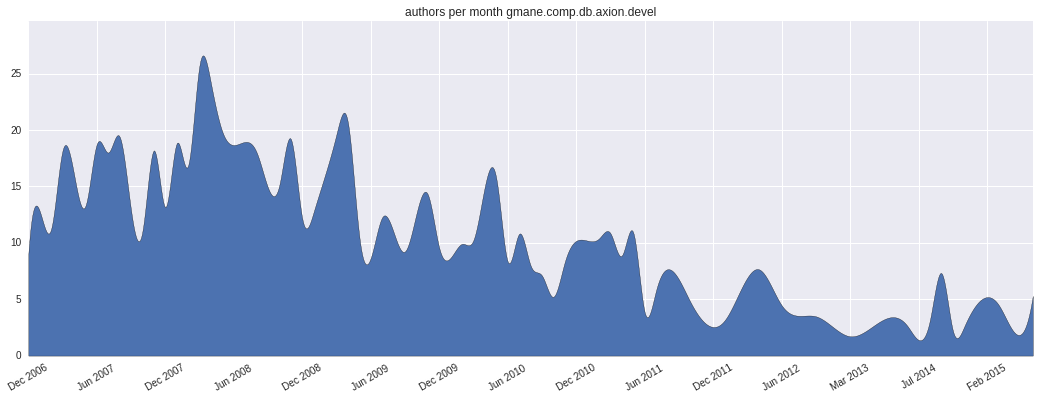

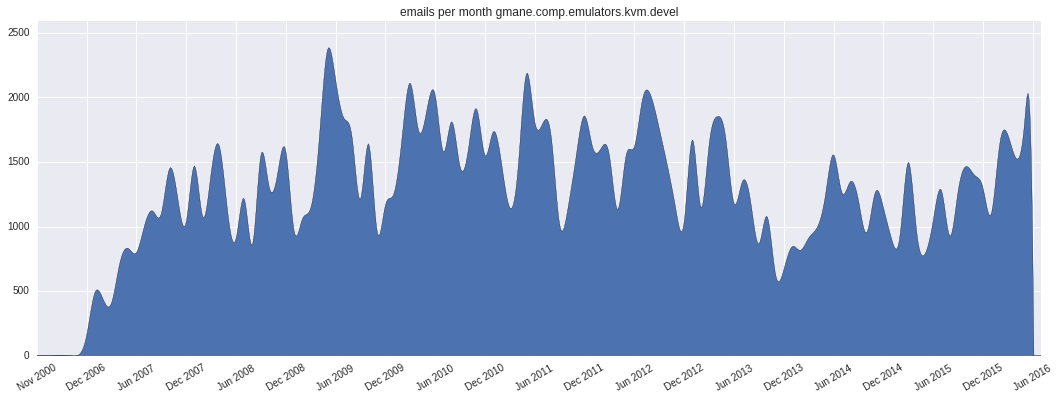

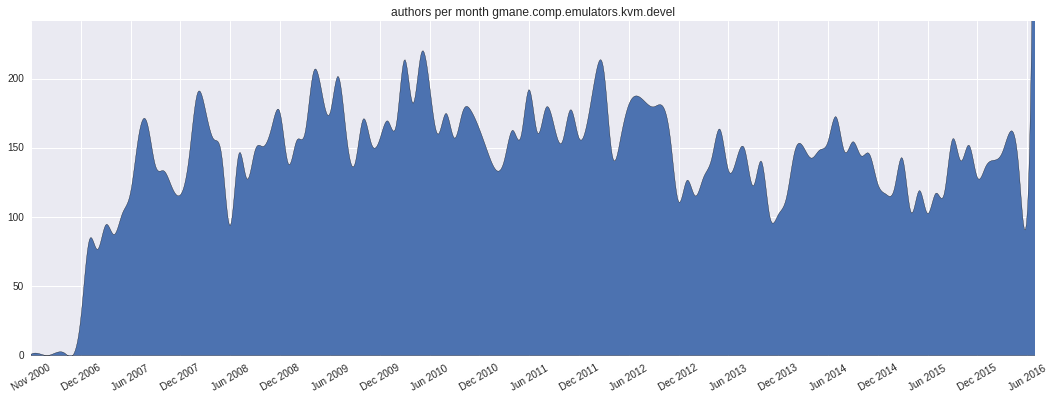

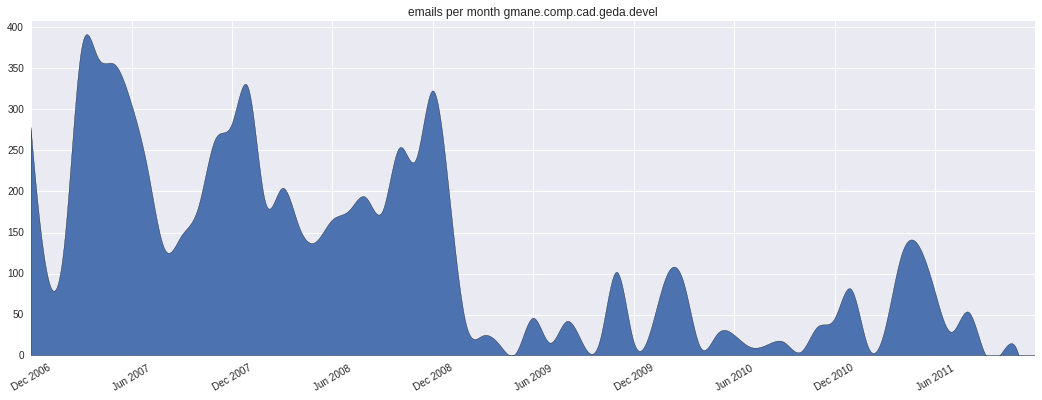

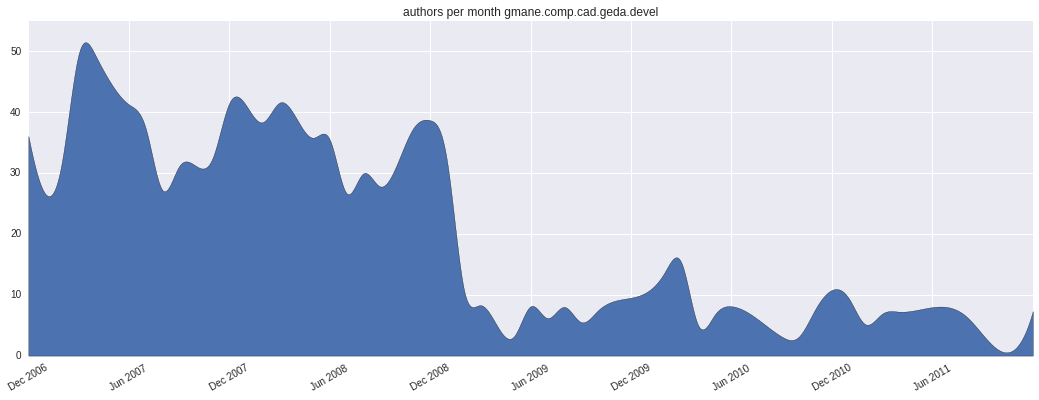

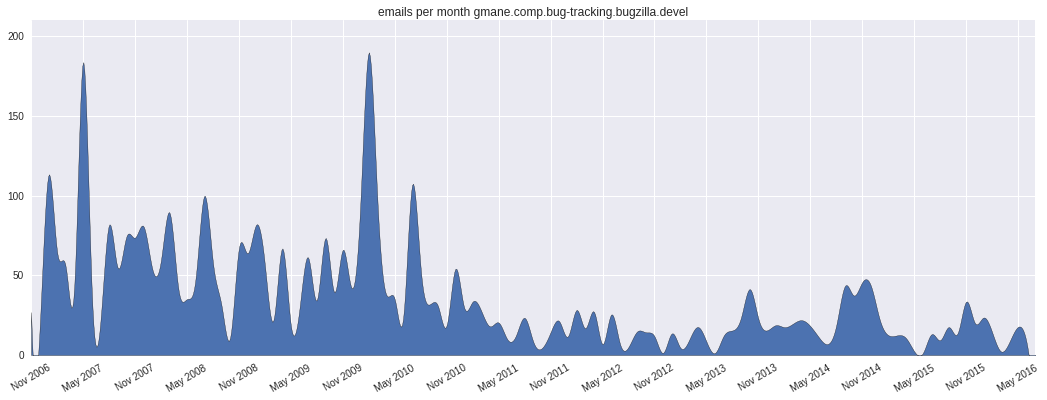

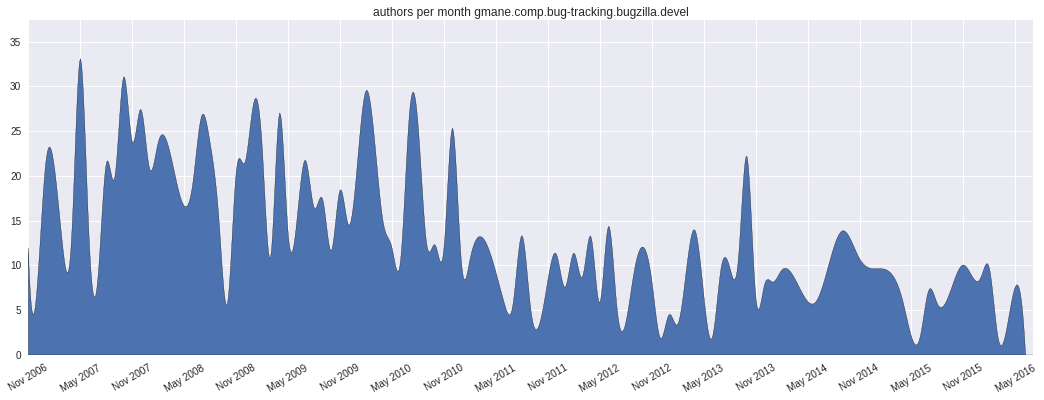

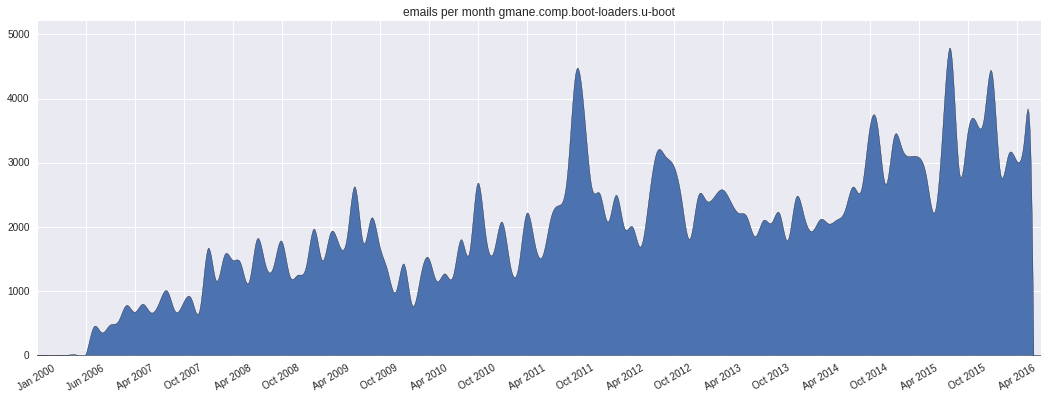

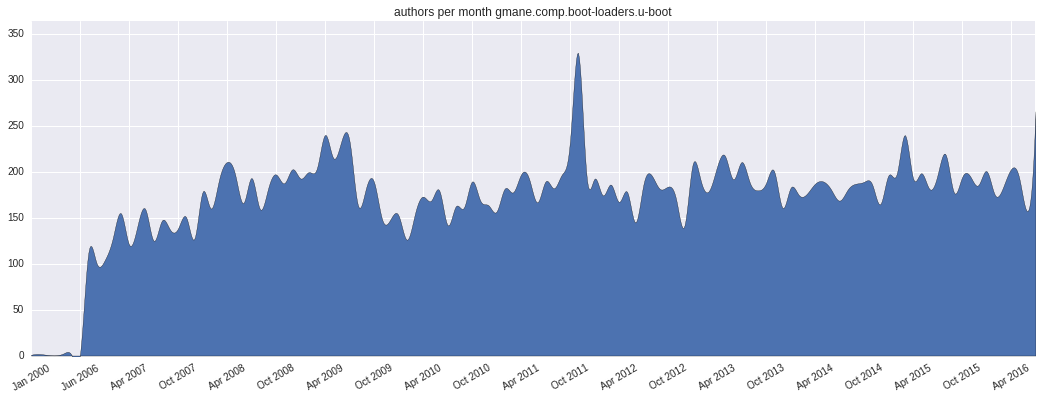

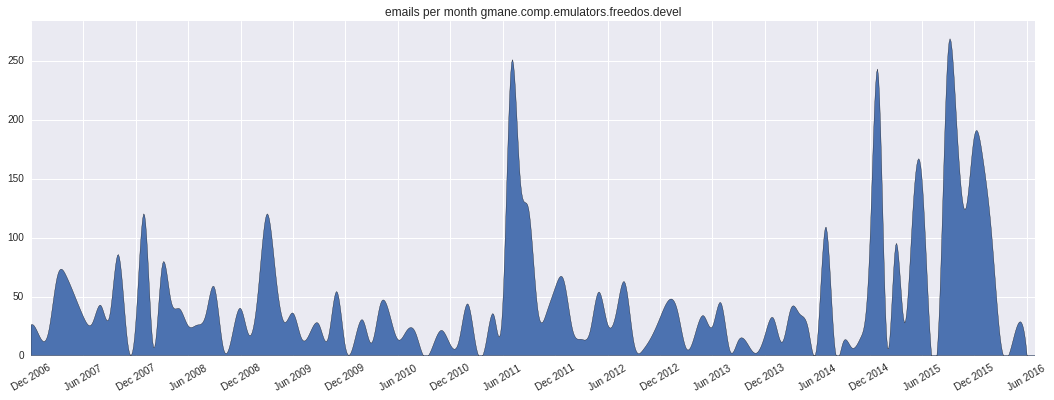

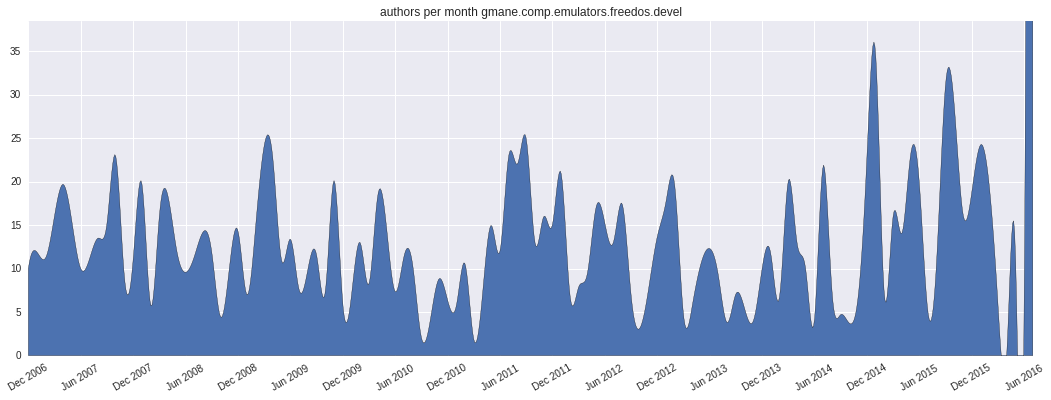

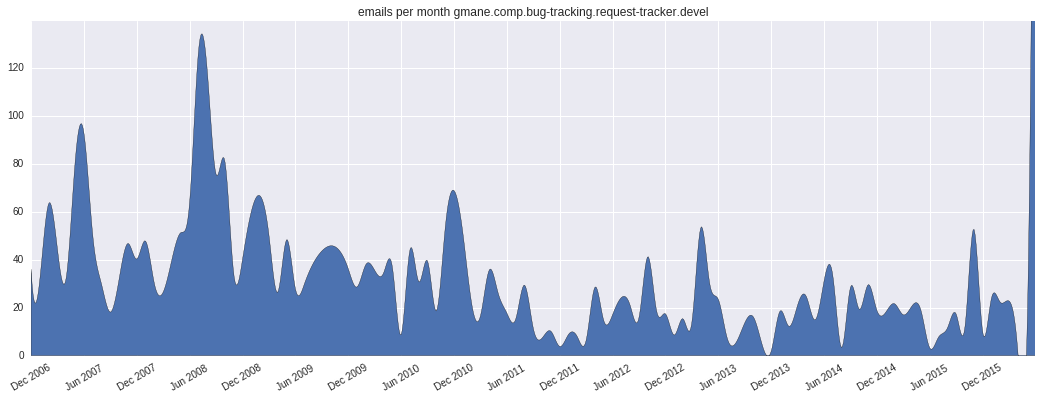

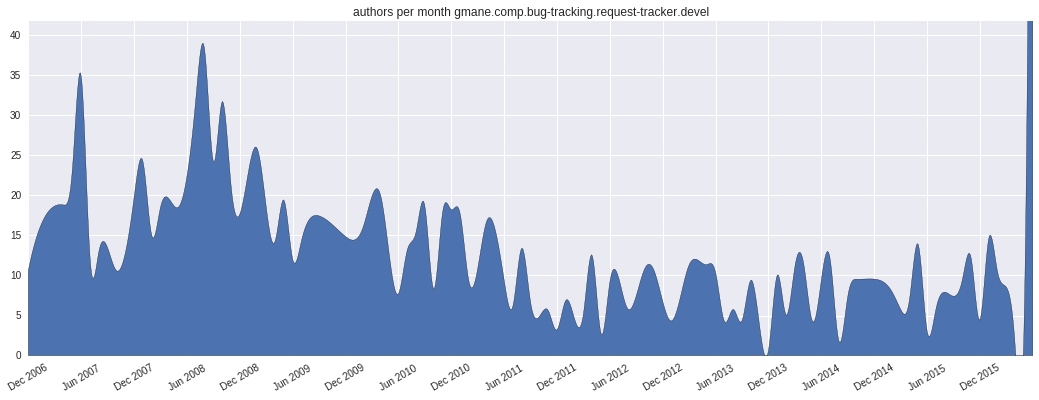

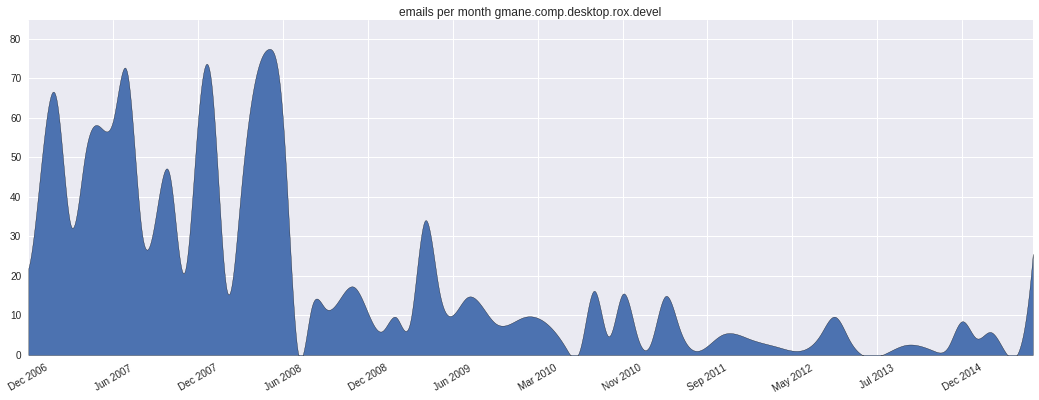

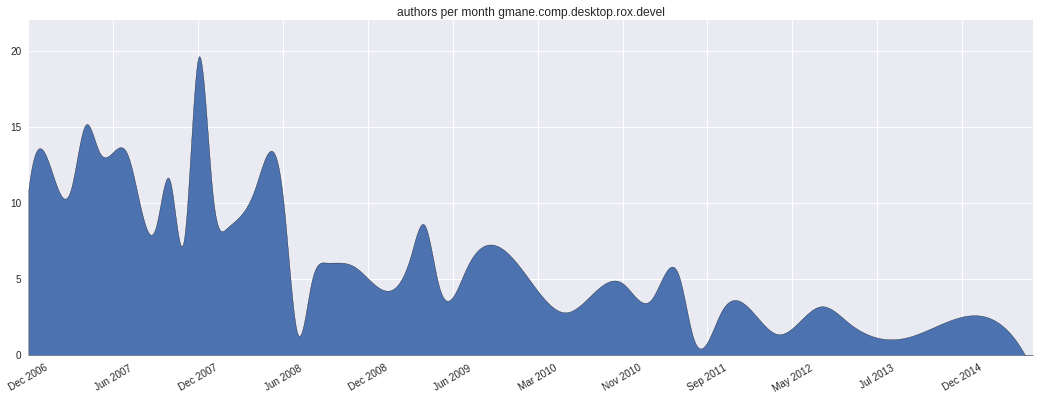

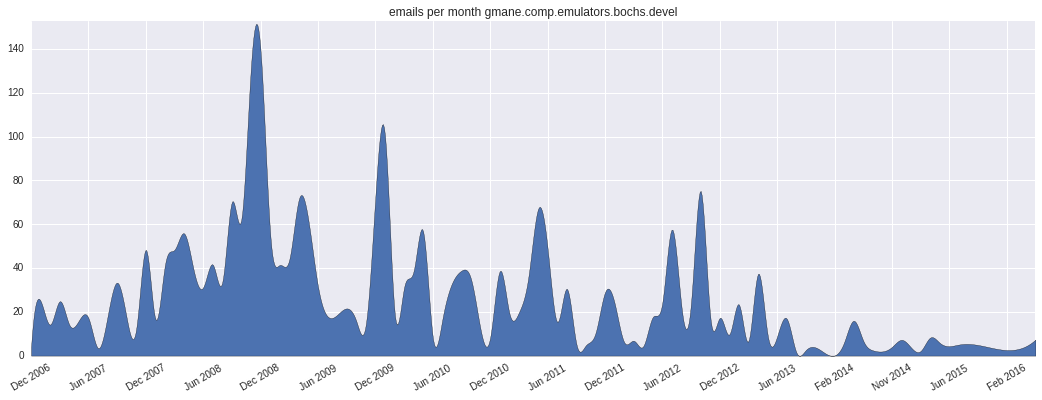

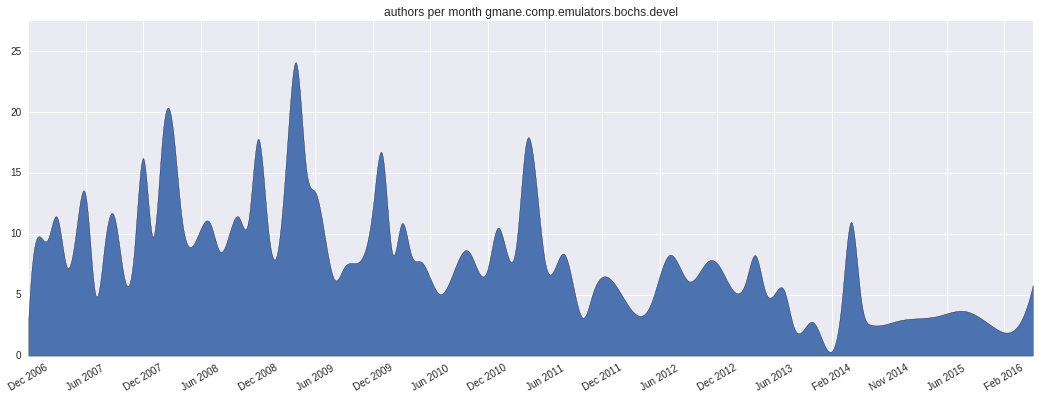

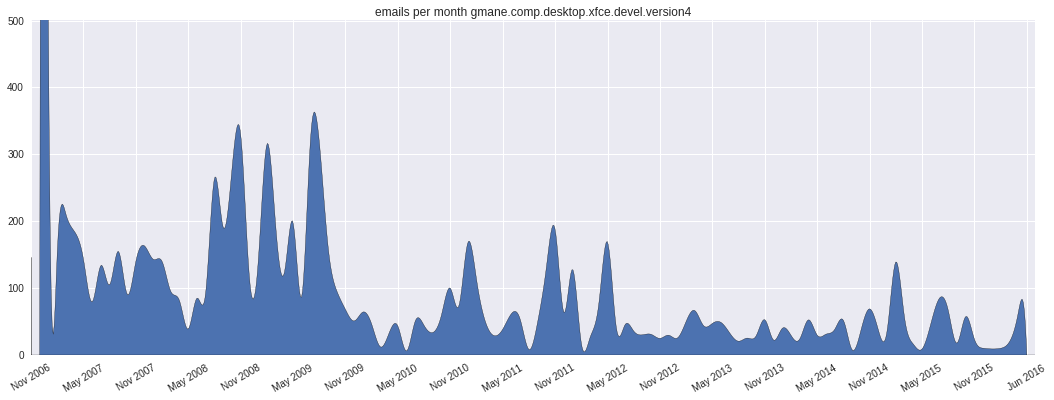

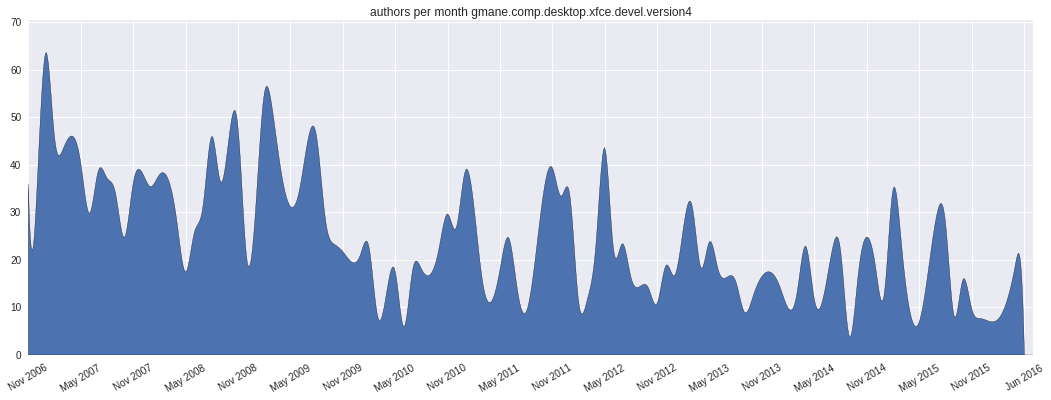

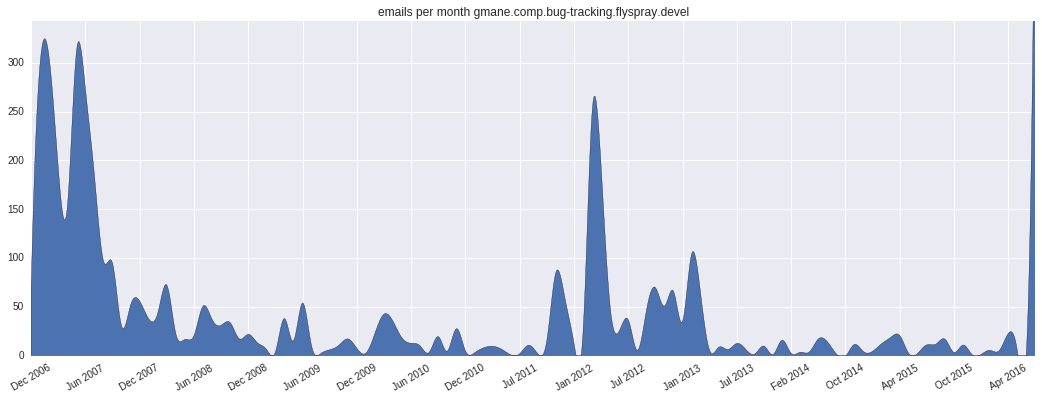

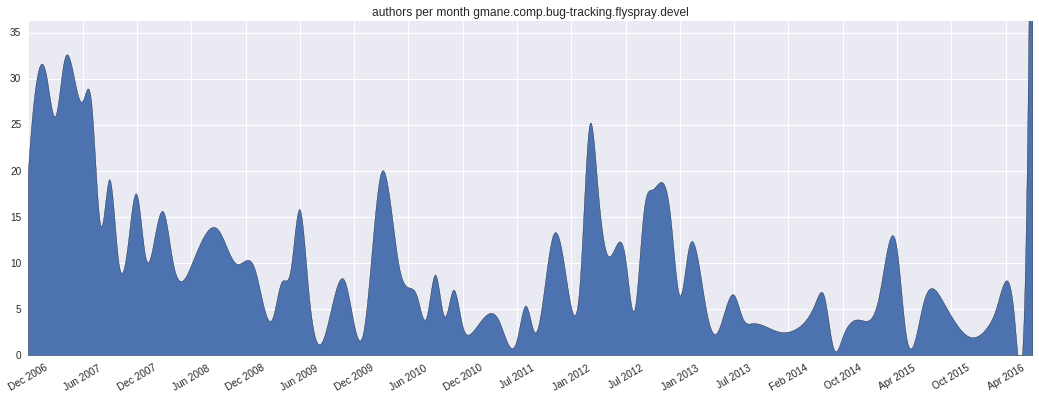

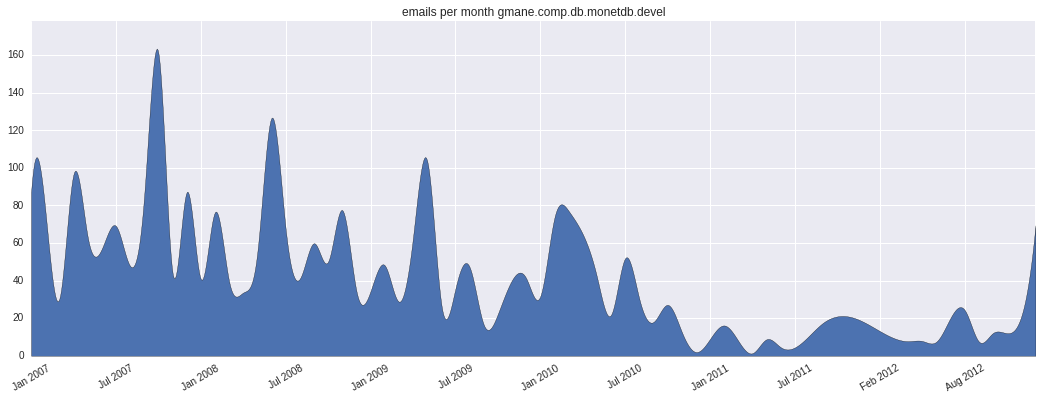

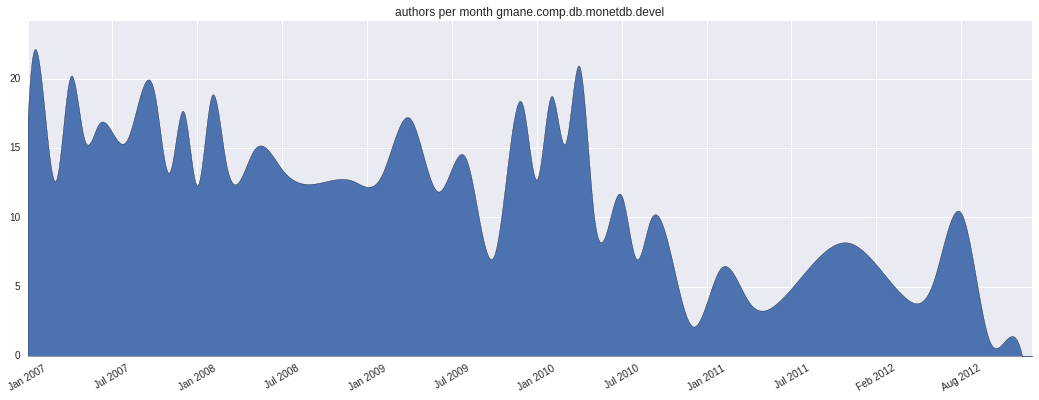

In [70]:
start_date = '2007-01-01'
end_date = '2016-06-30'

for project in emails.keys():
    p_emails = pd.DataFrame(emails[project])
    
    mails_per_month = p_emails.to_period(freq='M').from_address.groupby(level=0).count()
    title = 'emails per month {}'.format(project)
    plot_counts_per_time(mails_per_month, title)
    
    mails_per_month = p_emails.to_period(freq='M')
    authors_per_month = pd.DataFrame(index=mails_per_month.index.unique(), columns=['n_authors'], dtype=int)
    for name, group in mails_per_month.groupby(level=0):
        n_authors = len(group.from_address.unique())
        authors_per_month.loc[name, 'n_authors'] = n_authors
    
    title = 'authors per month {}'.format(project)
    plot_counts_per_time(authors_per_month.n_authors, title)
    
    # break # go only over one project, for development purposes

(0, 38)

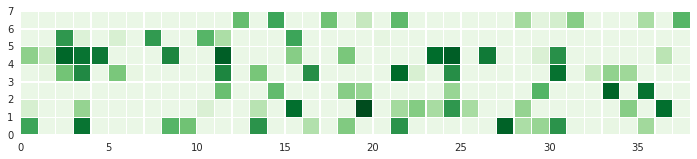

In [106]:
# Another idea: use github-like activity plot. example:
# prepare some random data
N = 100
np.random.seed(0)
weekday = np.random.randint(0, 7, N)
week = np.random.randint(0, 40, N)
activity = np.random.randint(0, 100, N)

df = pd.DataFrame({"weekday":weekday, "week":week, "activity":activity})
df.drop_duplicates(subset=["weekday", "week"], inplace=True)

# reshape the data and plot it
df2 = df.pivot(columns="week", index="weekday", values="activity")
df2.fillna(0, inplace=True)

Weekday, Week = np.mgrid[:df2.shape[0]+1, :df2.shape[1]+1]
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_aspect("equal")
plt.pcolormesh(Week, Weekday, df2.values, cmap="Greens", edgecolor="w", vmin=-10, vmax=100)
plt.xlim(0, df2.shape[1])